In [9]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Getting dataset
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


In [13]:
# creating UCB algorithm
import math
N = 10000
d = 10 
No_selections = [0] * 10
Sum_rewards = [0] * 10
ads_selected = []
total_rewards = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if No_selections[i] > 0:
            r_average = Sum_rewards[i]/ No_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/No_selections[i])
            upper_bound = r_average + delta_i
        else:
            upper_bound = 1e44
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
        ads_selected.append(ad)
        No_selections[ad] += 1
        Sum_rewards[ad] = Sum_rewards[ad] + dataset.values[n,ad]
        total_rewards = total_rewards + dataset.values[n,ad]
   



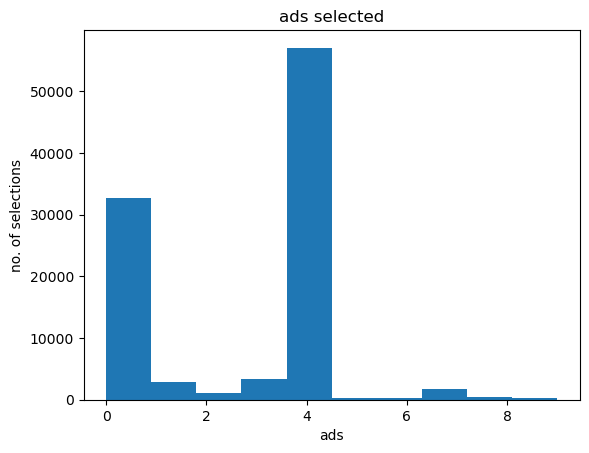

In [17]:
# Visualization
plt.hist(ads_selected)
plt.title("ads selected")
plt.xlabel('ads')
plt.ylabel('no. of selections')
plt.show()